In [2]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="cricket_ml"
)


C:\Users\hp\AppData\Local\Temp\ipykernel_26636\4056416768.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


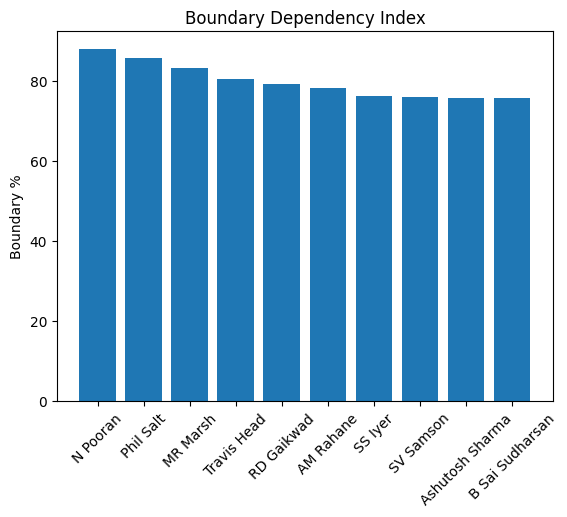

In [3]:
query = """
SELECT
    p.player_name,
    SUM(bd.runs_batter) AS total_runs,
    SUM(CASE WHEN bd.is_four = 1 THEN 4 ELSE 0 END +
        CASE WHEN bd.is_six = 1 THEN 6 ELSE 0 END) AS boundary_runs
FROM ball_delivery bd
JOIN player p ON bd.batter_id = p.player_id
GROUP BY p.player_name
HAVING total_runs >= 50
"""
df = pd.read_sql(query, conn)

df["boundary_pct"] = (df["boundary_runs"] / df["total_runs"]) * 100

df = df.sort_values("boundary_pct", ascending=False).head(10)

plt.figure()
plt.bar(df["player_name"], df["boundary_pct"])
plt.xticks(rotation=45)
plt.ylabel("Boundary %")
plt.title("Boundary Dependency Index")
plt.show()


In [4]:
query = """
SELECT 
    p.player_name AS batter,
    COUNT(*) AS sixes
FROM ball_delivery bd
JOIN player p ON bd.batter_id = p.player_id
WHERE bd.is_six = 1
GROUP BY p.player_name
ORDER BY sixes DESC
LIMIT 10
"""
df = pd.read_sql(query, conn)
df


C:\Users\hp\AppData\Local\Temp\ipykernel_26636\1980104525.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,batter,sixes
0,SS Iyer,9
1,N Pooran,7
2,MR Marsh,6
3,B Sai Sudharsan,6
4,Ishan Kishan,6
5,Dhruv Jurel,6
6,Q de Kock,6
7,AM Rahane,5
8,Ashutosh Sharma,5
9,SB Dubey,4


In [5]:
query = """
SELECT 
    p.player_name AS batter,
    COUNT(*) AS fours
FROM ball_delivery bd
JOIN player p ON bd.batter_id = p.player_id
WHERE bd.is_four = 1
GROUP BY p.player_name
ORDER BY fours DESC
LIMIT 10
"""
df = pd.read_sql(query, conn)
df


C:\Users\hp\AppData\Local\Temp\ipykernel_26636\1300005030.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,batter,fours
0,Ishan Kishan,11
1,Dhruv Jurel,10
2,Q de Kock,9
3,SV Samson,9
4,Travis Head,9
5,Phil Salt,9
6,AM Rahane,7
7,Priyansh Arya,7
8,RD Gaikwad,6
9,N Pooran,6


C:\Users\hp\AppData\Local\Temp\ipykernel_26636\2446458700.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


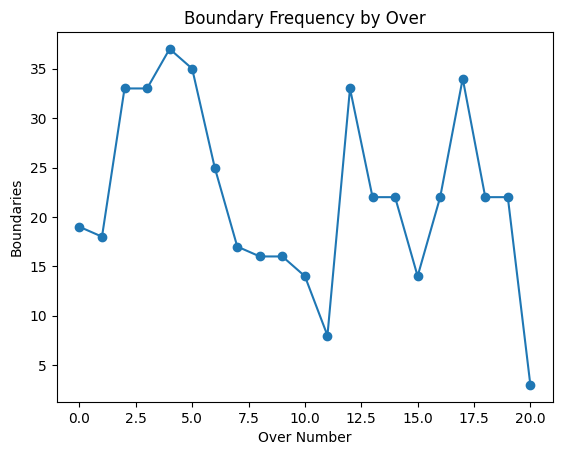

In [6]:
query = """
SELECT
    over_number,
    SUM(fours + sixes) AS boundaries
FROM over_summary
GROUP BY over_number
ORDER BY over_number
"""
df = pd.read_sql(query, conn)

plt.figure()
plt.plot(df["over_number"], df["boundaries"], marker="o")
plt.xlabel("Over Number")
plt.ylabel("Boundaries")
plt.title("Boundary Frequency by Over")
plt.show()
